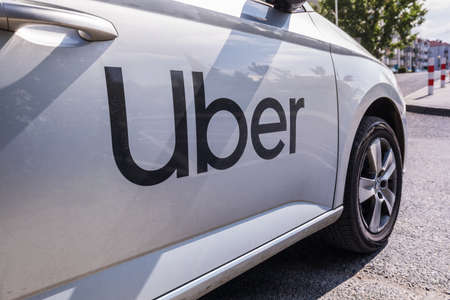

# Uber Fares Prediction

## Description:
The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

## The datset contains the following fields:

## Acknowledgement:
The dataset is referred from Kaggle.

## Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the fare price of uber ride.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

In [3]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import matplotlib
%matplotlib inline

In [4]:
#import out data in dataframe
df = pd.read_csv('uber.csv')

In [5]:
#chech head

In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Data Analysis

In [7]:
#dropping unnamed col
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [9]:
for i in df.columns:
    print('Missing value in {} are {} and {}%.'.format(i,df[i].isnull().sum(),np.round((df[i].isnull().sum()/200000*100)),2))

Missing value in key are 0 and 0.0%.
Missing value in fare_amount are 0 and 0.0%.
Missing value in pickup_datetime are 0 and 0.0%.
Missing value in pickup_longitude are 0 and 0.0%.
Missing value in pickup_latitude are 0 and 0.0%.
Missing value in dropoff_longitude are 1 and 0.0%.
Missing value in dropoff_latitude are 1 and 0.0%.
Missing value in passenger_count are 0 and 0.0%.


In [10]:
#longitude and latitude showing one missing value each. so lets drop them.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                199999 non-null  object 
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


Now there is no null values in our data.

In [11]:
df.head(1).T

,0
key,2015-05-07 19:52:06.0000003
fare_amount,7.5
pickup_datetime,2015-05-07 19:52:06 UTC
pickup_longitude,-73.999817
pickup_latitude,40.738354
dropoff_longitude,-73.999512
dropoff_latitude,40.723217
passenger_count,1


## Data Cleaning

In [12]:
import datetime as dt

# using pd.to_datetime to convert pickup_datetime col into pd's datetime format
df['pickup_datetime'] =pd.to_datetime(df['pickup_datetime'],errors='coerce')

In [13]:
# Creating year,month,day and time columns from pickup_datetime
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.weekday

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                199999 non-null  object             
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
 8   year               199999 non-null  int64              
 9   month              199999 non-null  int64              
 10  day                199999 non-null  int64              
 11  hour               199999 non-null  int64              
 12  day_of_week        199999 non-

In [15]:
#now we can delete pickup_datetime col
df.drop('pickup_datetime',axis=1,inplace=True)

In [16]:
from geopy.geocoders import Nominatim
from math import *

In [17]:
# calculating and creating distance column from longitude and latitude columns with the help of mpu libray

In [18]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for i in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[i],latitude1[i],longitude2[i],latitude2[i]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist



In [19]:
df['distance']=np.round(distance_transform(df['pickup_longitude'].to_numpy(),
                  df['pickup_latitude'].to_numpy(),
                  df['dropoff_longitude'].to_numpy(),
                  df['dropoff_latitude'].to_numpy()),2)
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,distance
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,3,1.68
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,2.46
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,0,5.04
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,4,1.66
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,3,4.48


## Exploratory Data Analysis

In [20]:
df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.95,0.96,0.97,0.98,0.99,1])

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,distance
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,2011.742434,6.281791,15.704739,13.491387,3.048435,20.855349
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,1.856400,3.438933,8.687377,6.515505,1.946946,382.964645
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
1%,3.300000,-74.014402,0.000000,-74.015288,0.000000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2%,3.500000,-74.010428,40.604666,-74.012215,40.579128,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3%,3.700000,-74.008760,40.645455,-74.009957,40.646968,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.010000
4%,4.000000,-74.007795,40.680999,-74.008408,40.673488,1.000000,2009.000000,1.000000,2.000000,1.000000,0.000000,0.270000
5%,4.100000,-74.006838,40.701801,-74.007460,40.686410,1.000000,2009.000000,1.000000,2.000000,1.000000,0.000000,0.430000
6%,4.100000,-74.006058,40.706675,-74.006465,40.694958,1.000000,2009.000000,1.000000,2.000000,1.000000,0.000000,0.510000


#### Lets find out central tendency and measures of dispersion

In [21]:
cols = ['fare_amount','passenger_count','year','hour','day_of_week','distance']

In [54]:
for i in cols:
    print('Mean for {} is: {} and Median is: {}'.format(i,df[i].mean(),(df[i].median())))

Mean for fare_amount is: 11.359891549458371 and Median is: 8.5
Mean for passenger_count is: 1.6845434227171137 and Median is: 1.0
Mean for year is: 2011.7424337121686 and Median is: 2012.0
Mean for hour is: 13.491387456937284 and Median is: 14.0
Mean for day_of_week is: 3.048435242176211 and Median is: 3.0
Mean for distance is: 20.855349226745655 and Median is: 2.12


In [23]:
for i in cols:
    print('Minumum for {} is: {} and Maximum is: {}'.format(i,df[i].min(),(df[i].max())))

Minumum for fare_amount is: -52.0 and Maximum is: 499.0
Minumum for passenger_count is: 0 and Maximum is: 208
Minumum for year is: 2009 and Maximum is: 2015
Minumum for hour is: 0 and Maximum is: 23
Minumum for day_of_week is: 0 and Maximum is: 6
Minumum for distance is: 0.0 and Maximum is: 16409.24


In [24]:
for i in cols:
    print('St.d for {} is: {} and Skewness is: {}'.format(i,df[i].std(),(df[i].skew())))

St.d for fare_amount is: 9.90175999942789 and Skewness is: 4.50490018104507
St.d for passenger_count is: 1.385994897258999 and Skewness is: 18.14566734573356
St.d for year is: 1.8563995801734645 and Skewness is: 0.06302609081392521
St.d for hour is: 6.515505282980679 and Skewness is: -0.4337472647226101
St.d for day_of_week is: 1.9469455423847644 and Skewness is: -0.03996761942488087
St.d for distance is: 382.96464542001803 and Skewness is: 22.198177127068888


In [25]:
# From above obervations we can understand that our data is not normally distributed and there may be outliers
# Now lets explore data with visualizations

In [26]:
matplotlib.rcParams['figure.figsize']=(10,5)

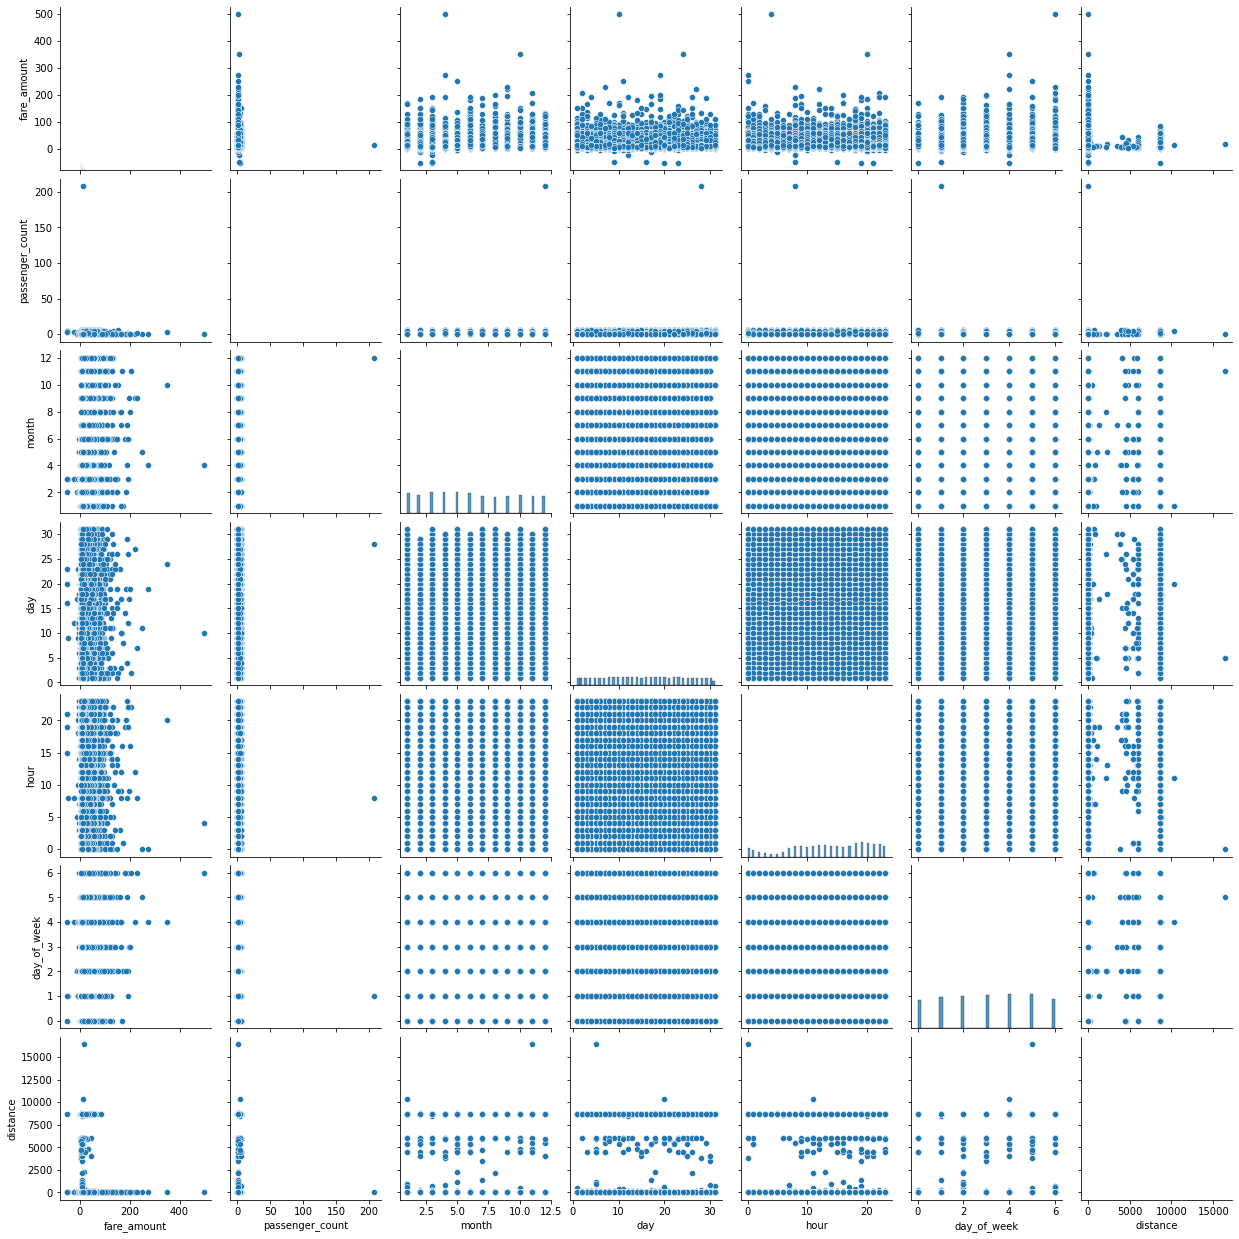

In [27]:
sns.pairplot(data=df.drop(['pickup_longitude','key','pickup_latitude','dropoff_longitude','dropoff_latitude','year'],axis=1))

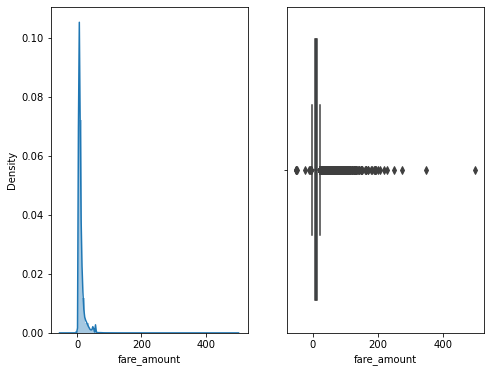

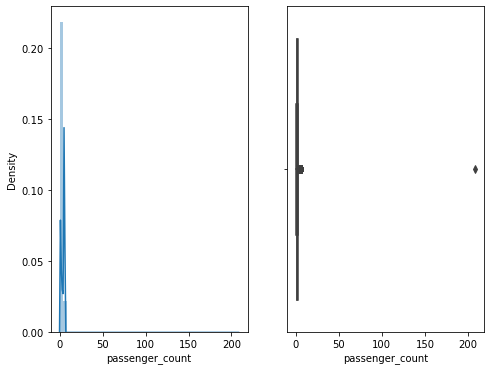

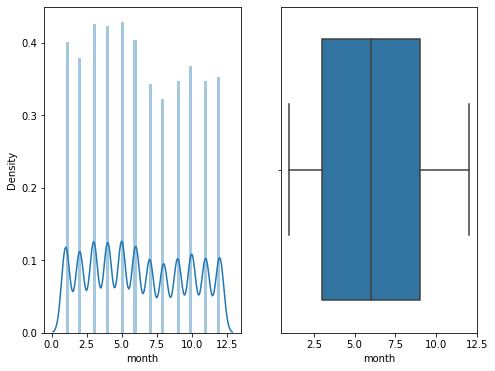

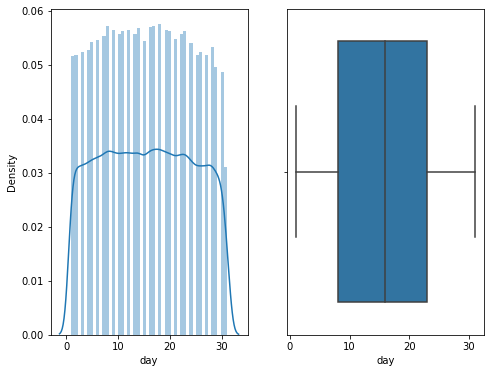

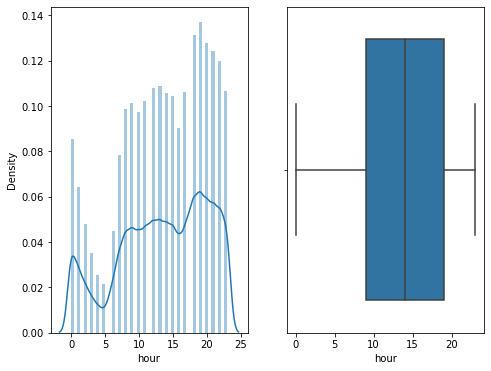

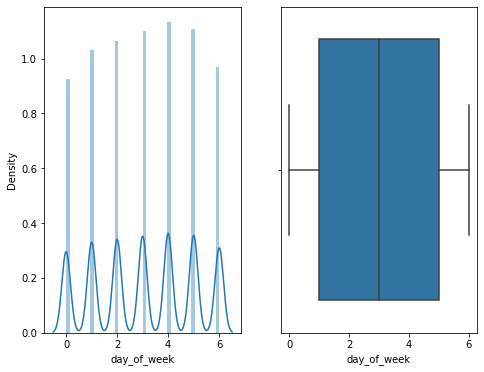

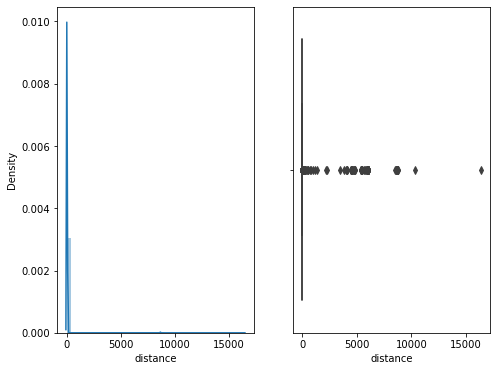

In [28]:

df1 = df.drop(['pickup_longitude','key','pickup_latitude','dropoff_longitude','dropoff_latitude','year'],axis=1)
for i in df1.columns:
    plt.figure(figsize=(12,6))
    plt.subplot(131)
    sns.distplot(df1[i],label='skew '+str(np.round(df1[i].skew(),2)))
    plt.subplot(132)
    sns.boxplot(df1[i])
    
    

<AxesSubplot:xlabel='distance', ylabel='fare_amount'>

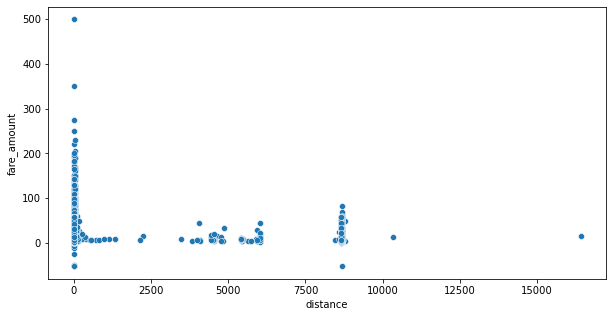

In [29]:
sns.scatterplot(x='distance',y='fare_amount',data=df)

Wall time: 48.7 s


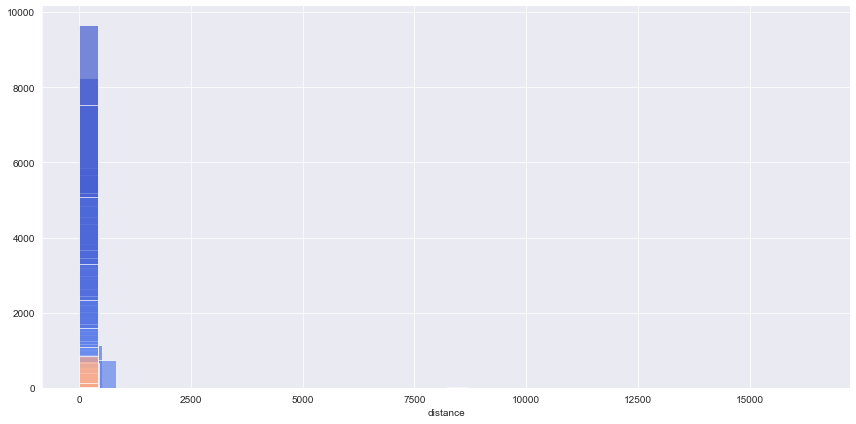

In [30]:
%%time
sns.set_style('darkgrid')
g=sns.FacetGrid(df,hue='fare_amount',palette='coolwarm',size=6,aspect=2)
g=g.map(plt.hist,'distance',bins=20,alpha=0.7)

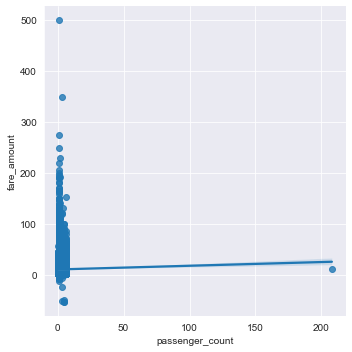

In [31]:
sns.lmplot(y='fare_amount',x='passenger_count',data=df)

In [32]:
df.groupby(['day_of_week','fare_amount']).max()

key  pickup_longitude  \
day_of_week fare_amount                                                   
0           -52.00        2015-02-23 19:26:44.0000004        -73.984665   
             0.01         2010-03-08 18:44:57.0000001        -74.000523   
             2.50         2015-06-22 10:06:29.0000001          0.000000   
             2.90         2012-06-04 17:37:50.0000003          0.000000   
             3.00         2015-06-15 19:03:44.0000003        -73.931967   
...                                               ...               ...   
6            180.00       2015-06-14 19:07:53.0000001        -73.567558   
             190.00       2012-07-29 08:28:11.0000002        -73.797236   
             206.38       2014-11-02 22:40:20.0000004        -73.782161   
             230.00      2014-09-07 08:39:00.00000012        -73.937765   
             499.00      2011-04-10 04:10:00.00000064        -73.968377   

                         pickup_latitude  dropoff_longitude  dropoff_latitude  \
day_of_week fare_amount                                                         
0           -52.00             40.759026           0.000000          0.000000   
             0.01              40.725868         -73.956960         40.780855   
             2.50              41.366138           0.000000         41.366138   
             2.90              40.814208           0.000000         40.811582   
             3.00              40.804083         -73.928697         40.800875   
...                                  ...                ...               ...   
6            180.00            41.047142         -73.567596         41.047127   
             190.00            40.665420         -73.101445         40.812208   
             206.38            40.644601         -74.449079         40.836457   
             230.00            40.758267         -74.382200         40.700890   
             499.00            40.764602         -73.968368         40.764600   

                         passenger_count  year  month  day  hour  distance  
day_of_week fare_amount                                                     
0           -52.00                     5  2015      2   23    19   8666.25  
             0.01                      1  2010      3    8    18      7.13  
             2.50                      6  2015     12   31    23   8674.80  
             2.90                      6  2012     12   30    23   6020.97  
             3.00                      6  2015     12   30    23     16.93  
...                                  ...   ...    ...  ...   ...       ...  
6            180.00                    1  2015      6   14    19      0.00  
             190.00                    1  2012      7   29     8     60.85  
             206.38                    1  2014     11    2    22     60.10  
             230.00                    2  2014      9    7     8     37.99  
             499.00                    1  2011      4   10     4      0.00  

[3995 rows x 11 columns]

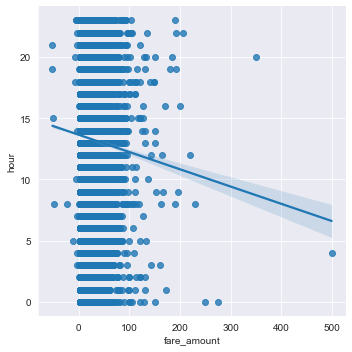

In [33]:
sns.lmplot(x='fare_amount',y='hour',data=df)

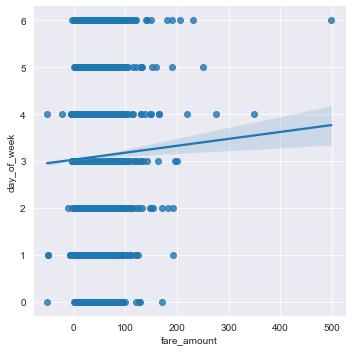

In [34]:
sns.lmplot(x='fare_amount',y='day_of_week',data=df)

#### Lets find exact outliers and remove them to make out data cleaner

In [35]:
df.head()
    
    

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,distance
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,3,1.68
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,2.46
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,0,5.04
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,4,1.66
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,3,4.48


In [36]:
q1 = df['fare_amount'].quantile(0.25)

In [37]:
q3 = df['fare_amount'].quantile(0.75)

In [38]:
iqr = q3-q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)

In [139]:
upper_limit = df.passenger_count.mean() + 3 * df.fare_amount.std()
lower_limit = df.passenger_count.mean() -3 * df.fare_amount.std()

In [140]:
print('with iqr method',lower)
print('with 3 std method',lower_limit)

with iqr method -3.75
with 3 std method -28.02073657556656


In [141]:
print('with iqr method',upper)
print('with 3 std method',upper_limit)

with iqr method 22.25
with 3 std method 31.389823421000784


In [69]:
# Drop key col for now as its not very useful its only giving info about datetime
df2 = df.drop('key',axis=1)
df2 = df2.select_dtypes(include=['number'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   year               199999 non-null  int64  
 7   month              199999 non-null  int64  
 8   day                199999 non-null  int64  
 9   hour               199999 non-null  int64  
 10  day_of_week        199999 non-null  int64  
 11  distance           199999 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 23.9 MB


In [71]:
df2.loc[df2.fare_amount<0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,distance
63395,-5.00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,3,23,1,0.33
71246,-3.30,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,11,21,3,0.50
79903,-3.50,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,1,14,4,0.38
89322,-49.57,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,9,8,1,0.02
92063,-23.70,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,12,8,4,8.17
98875,-52.00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,20,21,4,0.45
104080,-7.30,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,9,20,1,2.00
111589,-52.00,-73.984665,40.759026,0.000000,0.000000,5,2015,2,23,19,0,8666.25
139272,-6.90,-73.988727,40.736445,-73.977622,40.750487,1,2010,2,23,18,1,1.82
148803,-5.70,-73.977300,40.742783,-73.988837,40.747465,3,2010,2,12,10,4,1.10


In [43]:
#as we can see above fairamount is showing value less than 0 but we will keep rows only which has more than 0

In [74]:
df2 = df2.loc[df2['fare_amount'] >=0] 
df2.shape

(199977, 12)

In [86]:
df2.loc[df2.distance>139]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,distance
346,15.5,0.000000,0.000000,-73.979805,40.786030,1,2015,3,5,19,3,8666.40
1067,52.0,-73.781095,40.645015,0.000000,0.000000,1,2014,2,2,22,6,8647.04
1526,2.5,-74.001849,40.715156,0.000000,0.000000,3,2014,5,12,12,0,8666.77
1945,7.0,-0.131667,40.757063,-73.991593,40.749953,1,2013,2,10,16,6,6021.11
2167,5.7,-1.216667,40.748597,-74.004822,40.734670,1,2012,7,21,12,5,5941.06
...,...,...,...,...,...,...,...,...,...,...,...,...
198567,23.5,-73.968115,40.801455,0.000000,0.000000,2,2013,10,21,1,0,8665.75
198665,20.1,-0.116667,40.729775,0.000000,0.000000,5,2012,6,26,21,1,4528.96
199403,7.0,-67.370360,39.999790,-73.971058,40.753000,1,2013,1,20,17,6,565.23
199641,8.1,-74.000143,40.742877,-7.995197,40.759382,5,2012,6,22,12,4,5419.53


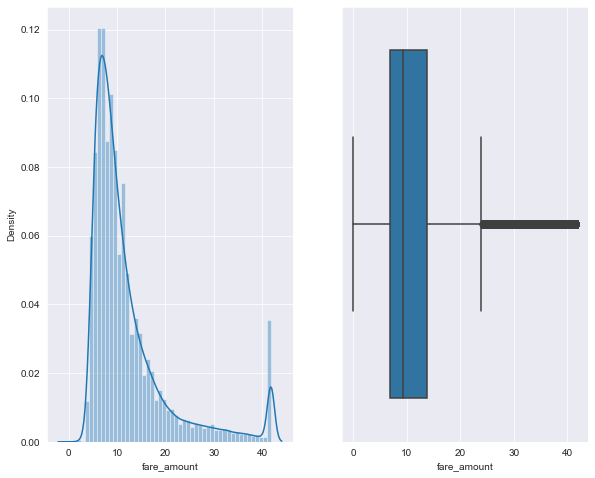

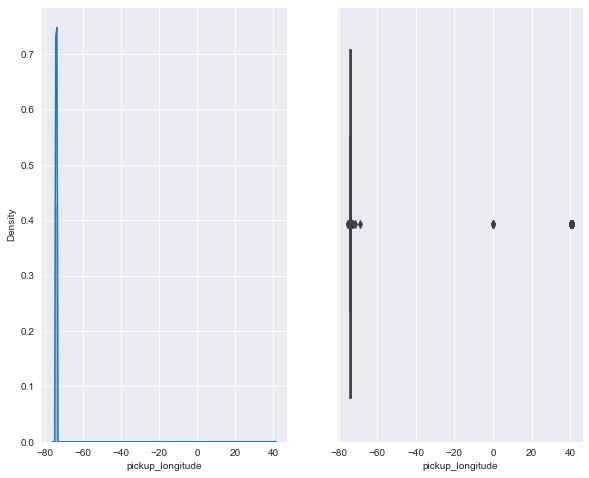

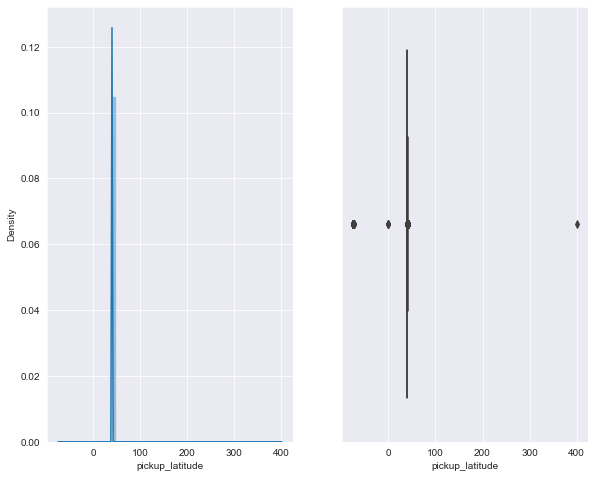

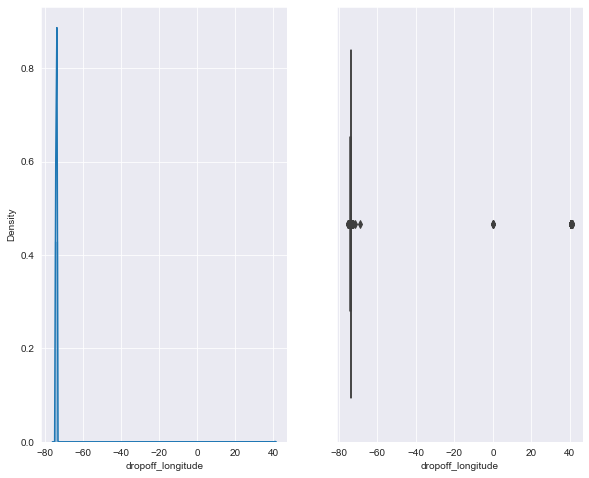

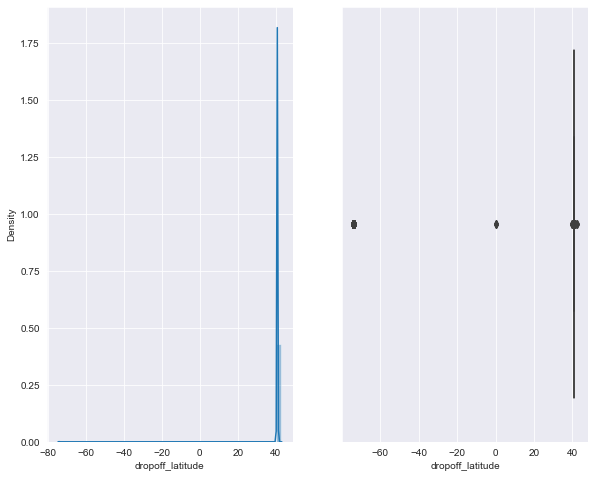

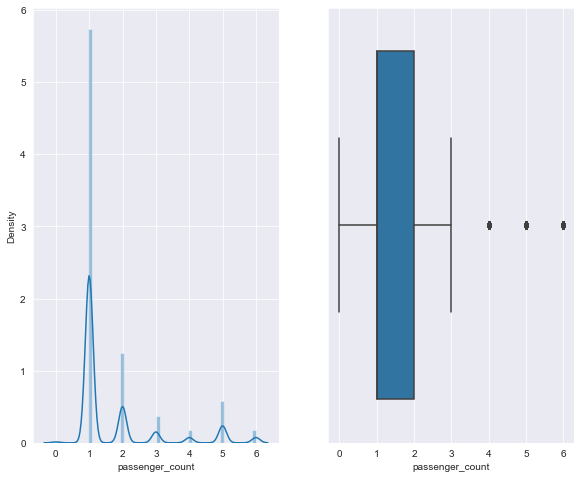

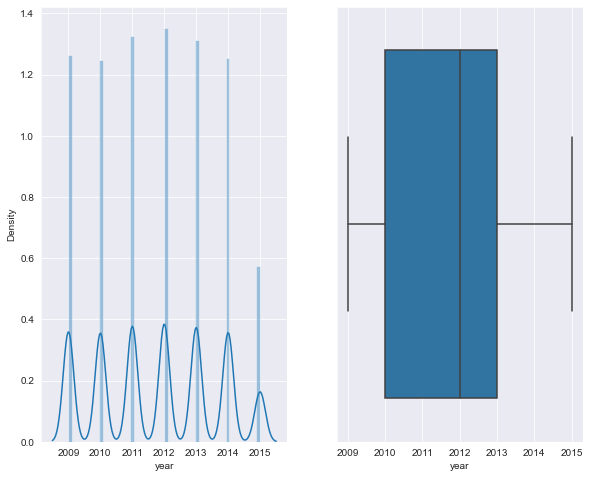

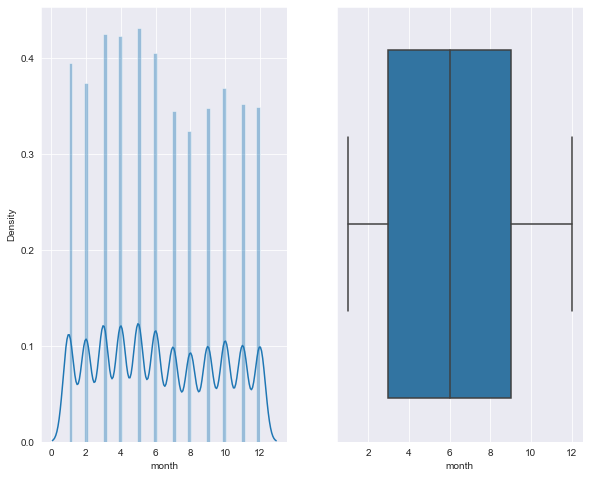

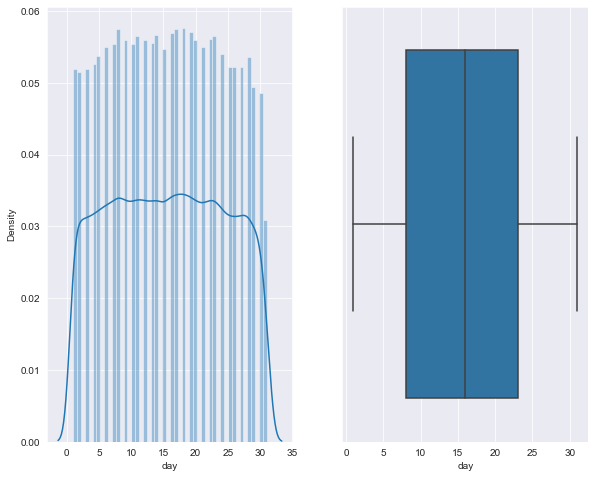

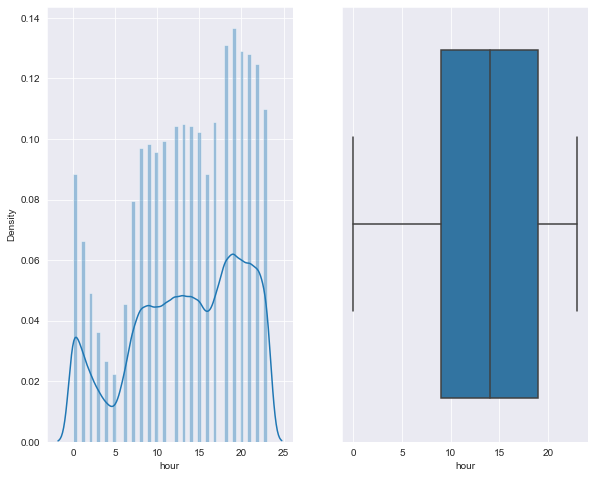

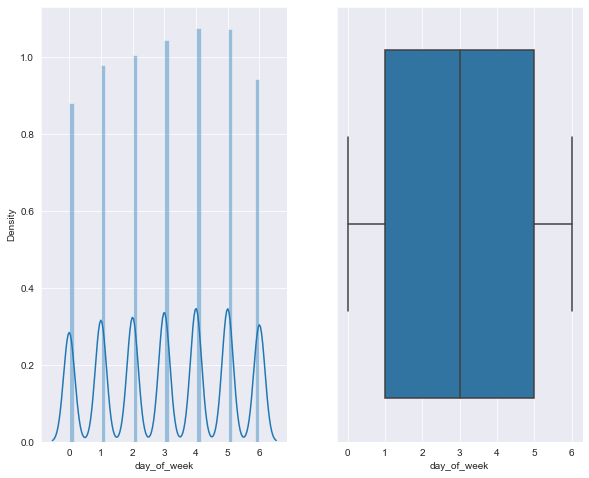

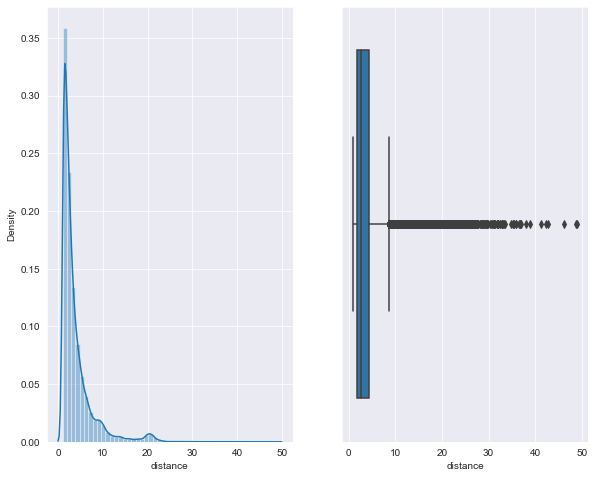

In [168]:
for i in df2.columns:
    plt.figure(figsize=(15,8))
    plt.subplot(131)
    sns.distplot(df2[i])
    plt.subplot(132)
    sns.boxplot(df2[i])

In [176]:
# fair amount and distance may  have some outliers
col2 = ['fare_amount','distance']
for i in col2:
    lower_i = df2[i].mean() - 3 * df2[i].std()
    upper_i = df2[i].mean() + 3 * df2[i].std()
    print('lower limit of {} is {} and upper is {}'.format(i,lower_i,upper_i))



lower limit of fare_amount is -12.72916391502568 and upper is 36.81876890210637
lower limit of distance is -7.2825782870365625 and upper is 14.958944796689549


In [189]:
df3 = df2.loc[(df2.fare_amount <30) & (df2.distance <= 20)]
df3.shape

(154279, 12)

### we are going to check the peak hours during weekdays

1. Plot a countplot to check the peak hours during weekdays

Text(0.5, 1.0, 'Cab Trip During Weekdays')

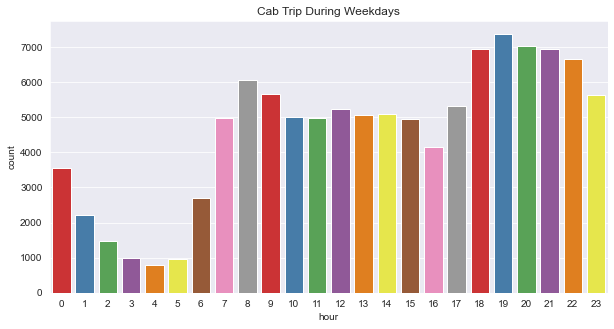

In [201]:
sns.countplot(x ='hour',data=df3.loc[(df3.day_of_week>=0) & (df3.day_of_week<=4)],palette='Set1')
plt.title('Cab Trip During Weekdays')

2. Plot a countplot to check the peak hours during weekends

Text(0.5, 1.0, 'Cab Trip During Weekends')

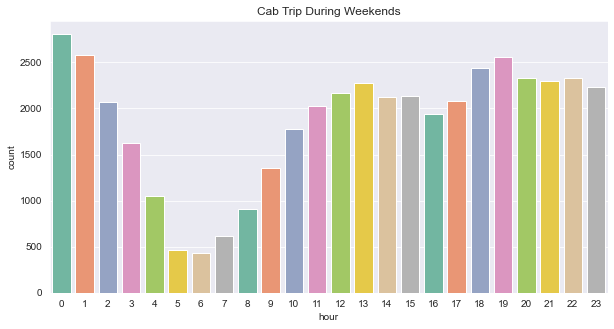

In [202]:
sns.countplot(x ='hour',data=df3.loc[(df3.day_of_week>=5) & (df3.day_of_week<=6)],palette='Set2')
plt.title('Cab Trip During Weekends')

In [210]:
# lets find correlation now
cor = df3.corr()
cor['fare_amount'].sort_values(ascending=True)

hour                -0.025464
dropoff_latitude    -0.010687
pickup_latitude     -0.010360
day                  0.004689
passenger_count      0.008669
pickup_longitude     0.011631
dropoff_longitude    0.012901
day_of_week          0.015306
month                0.026591
year                 0.137325
distance             0.836812
fare_amount          1.000000
Name: fare_amount, dtype: float64

<AxesSubplot:>

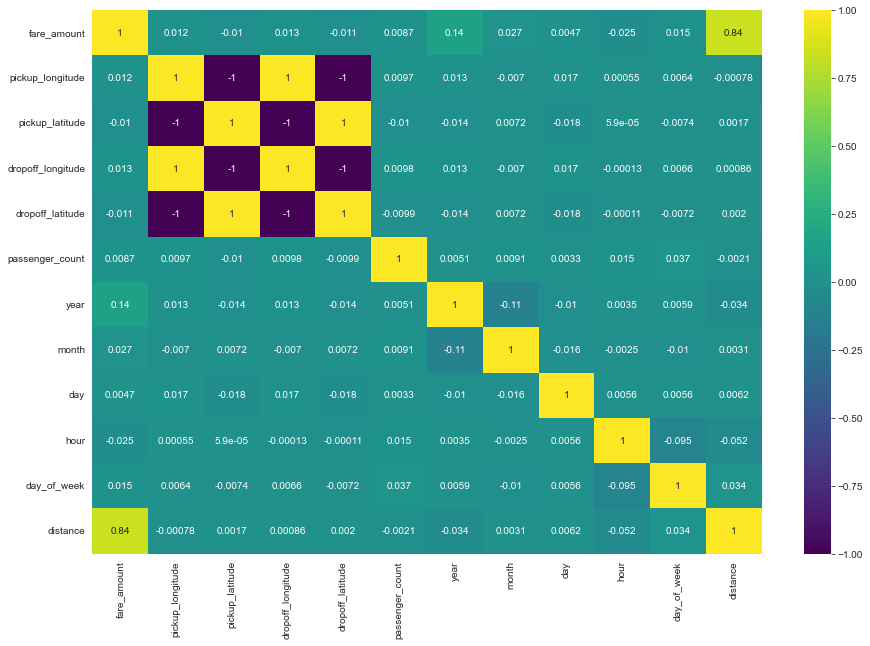

In [216]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap='viridis',vmax=1,vmin=-1)

In [425]:
# lets calculate vif to find out 

x = df3.drop('fare_amount',axis=1)
y = df3['fare_amount']

df_indeep = x
feature = list(df_indeep.columns)

for i in range(1,len(df_indeep.columns)):
    x = df_indeep.loc[:, df_indeep.columns != feature[i]]
    y = df_indeep.loc[:, df_indeep.columns == feature[i]]
    
    model = sm.OLS(y,x)
    result = model.fit()
    
    resq = result.rsquared
    vif = round(1/(1-resq),2)
    print('VIF value for {} is {}'.format(feature[i],vif))
    print('R^2 value for {} is {}'.format(feature[i],resq))

VIF value for pickup_latitude is 2659443.48
R^2 value for pickup_latitude is 0.9999996239814806
VIF value for dropoff_longitude is 9570704.76
R^2 value for dropoff_longitude is 0.9999998955144866
VIF value for dropoff_latitude is 2637951.42
R^2 value for dropoff_latitude is 0.9999996209179627
VIF value for passenger_count is 2.67
R^2 value for passenger_count is 0.6252199932367165
VIF value for year is 35443.12
R^2 value for year is 0.999971785778387
VIF value for month is 4.35
R^2 value for month is 0.7702178979483713
VIF value for day is 4.29
R^2 value for day is 0.7666819458804028
VIF value for hour is 5.26
R^2 value for hour is 0.8097151783733466
VIF value for day_of_week is 3.52
R^2 value for day_of_week is 0.7157336114524357
VIF value for distance is 3.14
R^2 value for distance is 0.681525098320797


In [440]:
X = df3.drop('fare_amount',axis=1)
Y = df3['fare_amount']

In [450]:
df3.shape

(154279, 12)

In [441]:
# for latitide and longitude shwoing is very high multicollinearity we can use PCA for multicollinearity reduction
# or according to demand from client we can drop them , but here we are fitting PCA
from sklearn.decomposition import PCA


In [442]:
# pca = PCA()
# pca_fitted = pca.fit_transform(x)
# pca.get_covariance()

In [443]:
# explained_variance = pca.explained_variance_ratio_
# explained_variance

In [444]:
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.axhline(y=.9,color='r')
# plt.xlabel('Number of components')
# plt.ylabel('cumulative explained variance')

.  Here we can see only 2 features explaining 90% variation but we will use 5

In [445]:
# pca = PCA(n_components=10)
# pca_x = pca.fit_transform(x)
# X = pd.DataFrame(pca_x)

### Split Train Test Data

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [451]:
# Checking data's shape now shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((107995, 11), (46284, 11), (107995,), (46284,))

## Initializing regression models 

In [452]:
lr = LinearRegression(n_jobs=2)
rfr = RandomForestRegressor(n_estimators=200)

### Fitting our Models

In [453]:
%%time
lr.fit(X_train,y_train)
rfr.fit(X_train,y_train)

Wall time: 2min 10s


RandomForestRegressor(n_estimators=200)

In [454]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [455]:
xgb.fit(X_train,y_train, verbose= True,early_stopping_rounds=10,eval_set=[(X_test,y_test)])

[0]	validation_0-rmse:8.02069
[1]	validation_0-rmse:5.87996
[2]	validation_0-rmse:4.46286
[3]	validation_0-rmse:3.56316
[4]	validation_0-rmse:3.01246
[5]	validation_0-rmse:2.69197
[6]	validation_0-rmse:2.50757
[7]	validation_0-rmse:2.40593
[8]	validation_0-rmse:2.34836
[9]	validation_0-rmse:2.31651
[10]	validation_0-rmse:2.29870
[11]	validation_0-rmse:2.28511
[12]	validation_0-rmse:2.26896
[13]	validation_0-rmse:2.26309
[14]	validation_0-rmse:2.25558
[15]	validation_0-rmse:2.25070
[16]	validation_0-rmse:2.24645
[17]	validation_0-rmse:2.22577
[18]	validation_0-rmse:2.21696
[19]	validation_0-rmse:2.21110
[20]	validation_0-rmse:2.21042
[21]	validation_0-rmse:2.20731
[22]	validation_0-rmse:2.20537
[23]	validation_0-rmse:2.18316
[24]	validation_0-rmse:2.17895
[25]	validation_0-rmse:2.17822
[26]	validation_0-rmse:2.17677
[27]	validation_0-rmse:2.16483
[28]	validation_0-rmse:2.15769
[29]	validation_0-rmse:2.14712
[30]	validation_0-rmse:2.14441
[31]	validation_0-rmse:2.14283
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### We have out data on 3 Regression models. Lets do predictions now

In [456]:
y_pred_lr = lr.predict(X_test)
y_pred_rfr = rfr.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

#### MSE,MAE,R^2,Train and Test Accuracy

In [457]:
lr_mse =round(mean_squared_error(y_test,y_pred_lr),2)
rfr_mse =round(mean_squared_error(y_test,y_pred_rfr),2)
xgb_mse =round(mean_squared_error(y_test,y_pred_xgb),2)
print("MSE of Our Models.")
print('Linear Regression:',lr_mse)
print('Random Forest:',rfr_mse)
print("XGB Regression:",xgb_mse)


MSE of Our Models.
Linear Regression: 6.92
Random Forest: 4.78
XGB Regression: 4.26


In [458]:
lr_mae = round(mean_absolute_error(y_test,y_pred_lr),2)
rfr_mae = round(mean_absolute_error(y_test,y_pred_rfr),2)
xgb_mae = round(mean_absolute_error(y_test,y_pred_xgb),2)
print("MAE of Our Models.")
print('Linear Regression:',lr_mae)
print('Random Forest:',rfr_mae)
print("XGB Regression:",xgb_mae)

MAE of Our Models.
Linear Regression: 1.81
Random Forest: 1.47
XGB Regression: 1.35


In [459]:
lr_rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_lr)),2)
rfr_rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_lr)),2)
xgb_rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_lr)),2)
print("RMSE of Our Models.")
print('Linear Regression:',lr_rmse)
print('Random Forest:',rfr_rmse)
print("XGB Regression:",xgb_rmse)

RMSE of Our Models.
Linear Regression: 2.63
Random Forest: 2.63
XGB Regression: 2.63


### Training Accuracy


In [460]:
print('Training Accuracy.')
print('Linear Regression: ',lr.score(X_train,y_train))
print('Random Forest: ',rfr.score(X_train,y_train))
print('XGB Regression: ',xgb.score(X_train,y_train))

Training Accuracy.
Linear Regression:  0.7314087958293504
Random Forest:  0.9739867153101169
XGB Regression:  0.8705044661747036


### Testing Accuracy

In [461]:
print('Testing Accuracy.')
print('Linear Regression: ',lr.score(X_test,y_test))
print('Random Forest: ',rfr.score(X_test,y_test))
print('XGB Regression: ',xgb.score(X_test,y_test))

Testing Accuracy.
Linear Regression:  0.7373334535361105
Random Forest:  0.8186942476518211
XGB Regression:  0.8384584756452464


In [462]:
coef_df_lr = pd.DataFrame(X_train.columns,lr.coef_)
coef_df_lr.transpose()



,-2.939103,10.537051,3.089690,-10.413008,0.039339,0.477034,0.064631,0.000597,0.014023,-0.034116,1.964077
0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,distance


In [463]:
lr.intercept_

-949.9207163422593

### OLS

In [464]:
linearg_full =sm.OLS(y_train,X_train).fit()

In [465]:
print(linearg_full.summary())

                                 OLS Regression Results                                
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          1.607e+05
Date:                Tue, 12 Jul 2022   Prob (F-statistic):                        0.00
Time:                        00:02:54   Log-Likelihood:                     -2.6387e+05
No. Observations:              107995   AIC:                                  5.278e+05
Df Residuals:                  107984   BIC:                                  5.279e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### Adjusted R^2

In [467]:
#Adjusted R^2 for Linear Regression
rsq_lr = lr.score(X_test,y_test)
#Number of observations
n = 107995
# Number of independent variables
p = 11

# Ajusted R^2
adjusted_r2_lr = 1-(1-rsq_lr)*(n-1)/(n-p-1)

#Adjusted R^2 for Random Forest
rsq_rfr = rfr.score(X_test,y_test)
n = 107995
p = 11
adjusted_r2_rfr = 1-(1-rsq_rfr)*(n-1)/(n-p-1)

#Adjusted R^2 for XGB Reg
rsq_xgb = xgb.score(X_test,y_test)

adjusted_r2_xgb = 1-(1-rsq_xgb)*(n-1)/(n-p-1)

In [476]:
print('Adjusted R^2.')
print('Adjusted R^2 of Linear Regression: ',adjusted_r2_lr)
print('Adjusted R^2 of Random Forest: ',adjusted_r2_rfr)
print('Adjusted R^2 of XGB Regression: ',adjusted_r2_xgb)

Adjusted R^2.
Adjusted R^2 of Linear Regression:  0.7373066962501386
Adjusted R^2 of Random Forest:  0.8186757784179988
Adjusted R^2 of XGB Regression:  0.8384420197515604


In [486]:
y_train_prd = rfr.predict(X_train)
DF_y_train_pred=pd.DataFrame(y_train_prd,columns=['price_predicted'])
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DF_y_train_pred.reset_index(drop=True, inplace=True)

Train_with_pred=pd.concat([X_train,y_train,DF_y_train_pred], axis=1)
Train_with_pred


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,distance,fare_amount,price_predicted
0,-74.008202,40.737625,-74.007495,40.712527,1,2013,1,14,22,0,2.79,10.0,10.05250
1,-74.003347,40.748820,-73.986084,40.752646,3,2013,2,9,23,5,1.52,6.0,6.68750
2,-73.975787,40.765463,-73.985315,40.738662,1,2010,9,14,14,1,3.09,9.7,9.40600
3,-73.969522,40.785186,-73.980415,40.746763,1,2014,2,21,19,4,4.37,16.5,15.94500
4,-73.976977,40.774865,-73.971147,40.762787,1,2009,3,16,9,0,1.43,7.7,7.28000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107990,-73.992429,40.745146,-73.973629,40.754919,2,2013,1,11,19,4,1.92,9.0,8.75425
107991,-73.990707,40.755872,-73.985588,40.767517,2,2009,6,5,23,4,1.36,5.7,5.90000
107992,-73.988663,40.757397,-73.921830,40.745373,1,2010,4,11,6,6,5.79,13.3,13.45450
107993,-73.992387,40.701860,-73.986612,40.740193,1,2012,8,23,6,3,4.29,11.3,11.34200


In [489]:
y_test_prd = rfr.predict(X_test)
DF_y_test_pred=pd.DataFrame(y_test_prd,columns=['price_predicted'])
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
DF_y_test_pred.reset_index(drop=True, inplace=True)

Test_with_pred=pd.concat([X_test,y_test,DF_y_test_pred], axis=1)
Test_with_pred

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,distance,fare_amount,price_predicted
0,-73.976617,40.780368,-73.885760,40.736254,1,2011,9,10,0,5,9.09,22.1,20.4179
1,-73.984108,40.729286,-73.976929,40.751881,6,2015,4,19,20,6,2.58,9.5,10.9235
2,-73.973214,40.760999,-73.982178,40.782849,1,2009,4,8,2,2,2.54,9.0,8.2915
3,-73.996143,40.759437,-74.004428,40.721165,1,2013,10,3,23,3,4.31,12.5,14.1840
4,-73.977673,40.779085,-73.996290,40.737108,2,2009,1,2,16,4,4.92,16.1,13.7190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46279,-73.987270,40.736092,-73.944362,40.714222,5,2014,9,28,1,6,4.36,19.5,17.1750
46280,-73.989512,40.741845,-73.988537,40.723015,2,2014,6,28,19,5,2.10,9.5,9.7400
46281,-73.989465,40.767955,-73.975535,40.750382,1,2009,9,1,15,1,2.28,8.1,10.1820
46282,-73.979455,40.746447,-74.009982,40.714442,1,2011,10,14,8,4,4.39,12.9,12.2480


# Random Forest Regression Performed good but bit low on test accuracy, XGB performed well on both, While Linear Regression did average